<a href="https://colab.research.google.com/github/hananbahtiti/Hybrid-Intrusion-detection-Systems/blob/main/network_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mrwellsdavid_unsw_nb15_path = kagglehub.dataset_download('mrwellsdavid/unsw-nb15')

print('Data source import complete.')


In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [ ]:
# ===========================
# 📁 Step 1: Create Output Folders
# ===========================

# Define folder paths
dataset_folder = '/kaggle/working/dataset'
model_folder = '/kaggle/working/model'

# Create dataset folder
os.makedirs(dataset_folder, exist_ok=True)
print(f"📁 Dataset folder has been created or already exists: {dataset_folder}")

# Create model folder
os.makedirs(model_folder, exist_ok=True)
print(f"📁 Model folder has been created or already exists: {model_folder}")

# ===========================
# 📄 Step 2: Load CSV Files
# ===========================

# Load the testing set CSV file into a DataFrame
df1 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')
print(f"✅ Loaded testing dataset with shape: {df1.shape}")

# Load the training set CSV file into another DataFrame
df2 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
print(f"✅ Loaded training dataset with shape: {df2.shape}")

# ===========================
# 🔗 Step 3: Combine the Two Datasets
# ===========================

# Concatenate the two datasets vertically (stack rows from both files)
df_combined = pd.concat([df1, df2], ignore_index=True)
print(f"🔗 Combined dataset shape: {df_combined.shape}")

# ===========================
# 💾 Step 4: Save Combined CSV
# ===========================

# Save the combined DataFrame into a new CSV file in the dataset folder
output_path = os.path.join(dataset_folder, 'UNSW_NB15.csv')
df_combined.to_csv(output_path, index=False)
print(f"💾 Combined dataset saved successfully at: {output_path}")


📁 Dataset folder has been created or already exists: /kaggle/working/dataset
📁 Model folder has been created or already exists: /kaggle/working/model
✅ Loaded testing dataset with shape: (175341, 45)
✅ Loaded training dataset with shape: (82332, 45)
🔗 Combined dataset shape: (257673, 45)
💾 Combined dataset saved successfully at: /kaggle/working/dataset/UNSW_NB15.csv


In [ ]:
import pandas as pd

# ===========================
# 📂 Step 1: Load Combined Dataset
# ===========================

# Read the combined UNSW-NB15 dataset from the saved CSV file
df = pd.read_csv(f'{dataset_folder}/UNSW_NB15.csv')
print(f"✅ Dataset loaded successfully from {dataset_folder}/UNSW_NB15.csv")

# ===========================
# ℹ️ Step 2: Display Dataset Structure
# ===========================

# Show summary information about the DataFrame
# This includes number of rows, columns, column data types, and memory usage
print("\n📊 Dataset Info:")
df.info()

# ===========================
# 👁️ Step 3: Preview the Data
# ===========================

# Display the first 5 rows of the dataset to get a quick look at the contents
print("\n🔍 First 5 Rows of the Dataset:")
df.head()


✅ Dataset loaded successfully from /kaggle/working/dataset/UNSW_NB15.csv

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss     

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
# ===========================
# 🧪 Step 4: Check for Missing Values
# ===========================

# Calculate and display the number of missing (NaN) values in each column
missing_values = df.isnull().sum()
print("\n🔎 Missing Values Per Column:")
print(missing_values)



🔎 Missing Values Per Column:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_s

In [ ]:
# ===========================
# 📉 Step 5: Percentage of Missing Values per Column
# ===========================

# Calculate the percentage of missing (NaN) values in each column
missing_percentages = df.isna().mean() * 100

# Display the result
print("\n📊 Percentage of Missing Values per Column:")
print(missing_percentages.sort_values(ascending=False))



📊 Percentage of Missing Values per Column:
id                   0.0
dur                  0.0
proto                0.0
service              0.0
state                0.0
spkts                0.0
dpkts                0.0
sbytes               0.0
dbytes               0.0
rate                 0.0
sttl                 0.0
dttl                 0.0
sload                0.0
dload                0.0
sloss                0.0
dloss                0.0
sinpkt               0.0
dinpkt               0.0
sjit                 0.0
djit                 0.0
swin                 0.0
stcpb                0.0
dtcpb                0.0
dwin                 0.0
tcprtt               0.0
synack               0.0
ackdat               0.0
smean                0.0
dmean                0.0
trans_depth          0.0
response_body_len    0.0
ct_srv_src           0.0
ct_state_ttl         0.0
ct_dst_ltm           0.0
ct_src_dport_ltm     0.0
ct_dst_sport_ltm     0.0
ct_dst_src_ltm       0.0
is_ftp_login         0.0
ct_ftp

In [ ]:
df[df['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
# ===========================
# 📊 Step 6: Count Unique Values in 'service' Column
# ===========================

# Calculate and display the count of each unique value in the 'service' column
service_counts = df['service'].value_counts()

# Print the result to show the frequency of each service category
print("\n📊 Value Counts for 'service' Column:")
print(service_counts)



📊 Value Counts for 'service' Column:
service
-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: count, dtype: int64


In [ ]:
# ===========================
# 🔄 Step 7: Replace Specific Values in 'service' Column
# ===========================

# Replace all occurrences of '-' in the 'service' column with the string 'unknown'
df = df.replace({'service': '-'}, 'unknown')

# Print confirmation that the replacement was completed
print("\n✅ All occurrences of '-' in the 'service' column have been replaced with 'unknown'.")



✅ All occurrences of '-' in the 'service' column have been replaced with 'unknown'.


In [ ]:
# ===========================
# 📊 Step 8: Count Unique Values in 'attack_cat' Column
# ===========================

# Calculate and display the count of each unique value in the 'attack_cat' column
attack_cat_counts = df['attack_cat'].value_counts()

# Print the result to show the frequency of each attack category
print("\n📊 Value Counts for 'attack_cat' Column:")
print(attack_cat_counts)



📊 Value Counts for 'attack_cat' Column:
attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


In [ ]:
# ===========================
# 📊 Step 9: Count Unique Values in 'proto' Column
# ===========================

# Calculate and display the count of each unique value in the 'proto' (protocol) column
proto_counts = df['proto'].value_counts()

# Print the result to show the frequency of each protocol type
print("\n📊 Value Counts for 'proto' Column:")
print(proto_counts)



📊 Value Counts for 'proto' Column:
proto
tcp      123041
udp       92701
unas      15599
arp        3846
ospf       3271
          ...  
argus       131
hmp         131
igmp         48
icmp         15
rtp           1
Name: count, Length: 133, dtype: int64


In [ ]:
# ===========================
# 📊 Step 10: Count Unique Values in 'state' Column
# ===========================

# Calculate and display the count of each unique value in the 'state' column
state_counts = df['state'].value_counts()

# Print the result to show the frequency of each state value
print("\n📊 Value Counts for 'state' Column:")
print(state_counts)



📊 Value Counts for 'state' Column:
state
FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
PAR         1
URN         1
no          1
CLO         1
Name: count, dtype: int64


In [ ]:
# ===========================
# 📊 Step 11: Count Unique Values in 'label' Column
# ===========================

# Calculate and display the count of each unique value in the 'label' (target) column
label_counts = df['label'].value_counts()

# Print the result to show the frequency of each label value
print("\n📊 Value Counts for 'label' Column:")
print(label_counts)



📊 Value Counts for 'label' Column:
label
1    164673
0     93000
Name: count, dtype: int64


In [ ]:
import pandas as pd
import os
import joblib
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

def data_encoding(file_path: str, columns: list, folder_path: str, mode: str):
    """
    Encodes categorical columns in a CSV file using Label Encoding.

    Parameters:
    - file_path (str): Path to the CSV file to be processed.
    - columns (list): List of column names to be encoded.
    - folder_path (str): Directory path to save/load encoders.
    - mode (str): 'train' to create and save encoders, 'test' to load existing ones.

    Returns:
    - str: Success message or error description.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Loop over each column specified for encoding
        for column in columns:
            if column in df.columns:
                print(f"\n🔄 Encoding column: '{column}'")

                # Replace NaN with empty string for safe encoding
                df[column] = df[column].fillna('').astype(str)

                # Define encoder file path
                encoder_path = os.path.join(folder_path, f"{column}__encoder.pkl")

                if mode == 'train':
                    # Extract unique values (excluding empty values) and show progress bar
                    unique_values = df[column].dropna().unique()
                    tqdm(unique_values, desc=f"Extracting values from '{column}'")

                    print(f"✅ Number of unique values in '{column}': {len(unique_values)}")

                    # Initialize and fit LabelEncoder
                    encoder = LabelEncoder()
                    encoder.fit(unique_values)

                    # Save the encoder using joblib
                    joblib.dump(encoder, encoder_path)
                    print(f"✅ Encoder saved to: {encoder_path}")

                elif mode == 'test':
                    # Check if encoder exists
                    if not os.path.exists(encoder_path):
                        print(f"❌ Encoder for column '{column}' not found at: {encoder_path}")
                        continue

                    # Load the encoder
                    encoder = joblib.load(encoder_path)
                    print(f"📦 Encoder loaded from: {encoder_path}")

                else:
                    print("❌ Invalid mode. Please use 'train' or 'test'.")
                    return "❌ Invalid mode."

                # Encode the column using the fitted or loaded encoder
                df[column] = encoder.transform(df[column])

            else:
                print(f"❌ Column '{column}' not found in the file.")

        # Save the updated DataFrame back to the CSV file
        df.to_csv(file_path, index=False)
        print(f"\n✅ Encoding completed for all specified columns in file: {file_path}")
        return "✅ Encoding completed."

    except Exception as e:
        # Handle and report any unexpected errors
        return f"❌ An error occurred: {e}"


In [ ]:
# ===========================
# 🔄 Step 12: Apply Encoding to Specific Columns
# ===========================

# Define the columns that need to be encoded in the dataset
columns_to_encode = ['attack_cat', 'state', 'service', 'proto']
# These columns are categorical and require encoding to numeric values for model processing.

# Call the data_encoding function to encode the specified columns in the dataset
encoding_result = data_encoding(
    file_path=f'{dataset_folder}/UNSW_NB15.csv',  # Path to the dataset file (input file)
    folder_path=f'{dataset_folder}',              # Folder path where the encoded data will be stored
    columns=columns_to_encode,                    # List of columns to encode, these are categorical features
    mode='train'                                  # Mode for encoding: 'train' means we fit the encoder on this dataset
)

# Print the result of the encoding operation (success or failure message)
# The output will provide information if the encoding was successful or not
print(encoding_result)



🔄 Encoding column: 'attack_cat'


Extracting values from 'attack_cat':   0%|          | 0/10 [00:00<?, ?it/s]


✅ Number of unique values in 'attack_cat': 10
✅ Encoder saved to: /kaggle/working/dataset/attack_cat__encoder.pkl

🔄 Encoding column: 'state'


Extracting values from 'state':   0%|          | 0/11 [00:00<?, ?it/s]


✅ Number of unique values in 'state': 11
✅ Encoder saved to: /kaggle/working/dataset/state__encoder.pkl

🔄 Encoding column: 'service'


Extracting values from 'service':   0%|          | 0/13 [00:00<?, ?it/s]

✅ Number of unique values in 'service': 13
✅ Encoder saved to: /kaggle/working/dataset/service__encoder.pkl



🔄 Encoding column: 'proto'


Extracting values from 'proto':   0%|          | 0/133 [00:00<?, ?it/s]


✅ Number of unique values in 'proto': 133
✅ Encoder saved to: /kaggle/working/dataset/proto__encoder.pkl

✅ Encoding completed for all specified columns in file: /kaggle/working/dataset/UNSW_NB15.csv
✅ Encoding completed.


In [ ]:
# ===========================
# 📂 Step 13: Load and Inspect the Dataset
# ===========================

# Load the dataset from the specified CSV file into a pandas DataFrame
df = pd.read_csv(f'{dataset_folder}/UNSW_NB15.csv')

# Display the summary information about the DataFrame, including the number of rows, columns, and data types
print("\n📊 Dataset Info:")
df.info()

# Display the first 5 rows of the dataset to preview its contents
print("\n👁️ First 5 Rows of the Dataset:")
df.head()



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  int64  
 3   service            257673 non-null  int64  
 4   state              257673 non-null  int64  
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,4,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,4,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,4,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,4,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,4,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


In [ ]:
# ===========================
# 🔄 Step 14: Drop Missing Values
# ===========================

# Drop any rows with missing values (NaN) from the DataFrame
df.dropna(inplace=True)

# Display updated summary information about the DataFrame after dropping missing values
print("\n📊 Dataset Info after Dropping Missing Values:")
df.info()



📊 Dataset Info after Dropping Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  int64  
 3   service            257673 non-null  int64  
 4   state              257673 non-null  int64  
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dlos

##  **Data Visualization**

In [ ]:
# ===========================
# 🗂️ Step 15: Create Folder for Storing Plots
# ===========================

# Define the folder path where the plots will be saved
plots_folder = '/kaggle/working/plots'

# Create the folder if it doesn't already exist (exist_ok=True ensures no error if the folder exists)
os.makedirs(plots_folder, exist_ok=True)

# Print confirmation message indicating the folder has been created
print(f"The folder has been created: {plots_folder}")


The folder has been created: /kaggle/working/plots


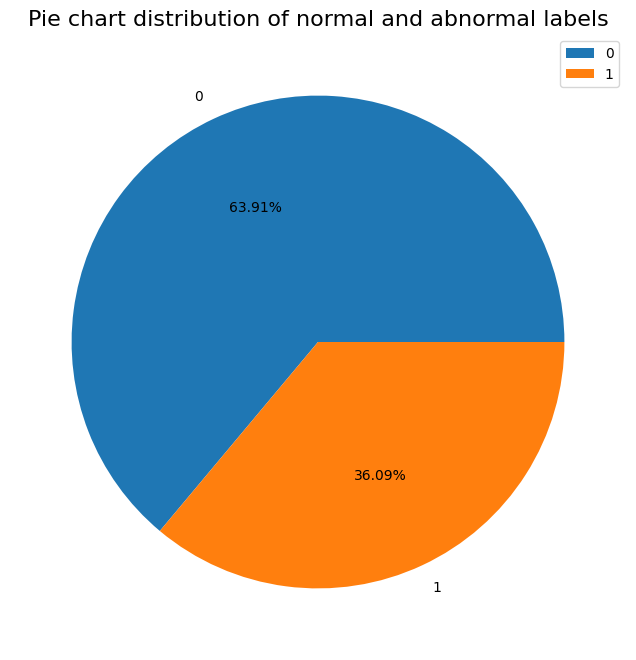

In [ ]:
# ===========================
# 📊 Step 16: Plot Pie Chart for Label Distribution
# ===========================

# Set up the figure size for the plot
plt.figure(figsize=(8, 8))

# Create a pie chart showing the distribution of the 'label' column values (0 for normal, 1 for abnormal)
plt.pie(df['label'].value_counts(),
        labels=[0, 1],               # Label the slices as 0 (normal) and 1 (abnormal)
        autopct='%0.2f%%')           # Display percentage on the chart with two decimal places

# Set the title of the pie chart
plt.title("Pie chart distribution of normal and abnormal labels", fontsize=16)

# Add a legend to the chart for clarity
plt.legend()

# Save the pie chart as a PNG file in the specified folder
plt.savefig(f'{plots_folder}/Pie_chart_binary.png')

# Display the plot
plt.show()


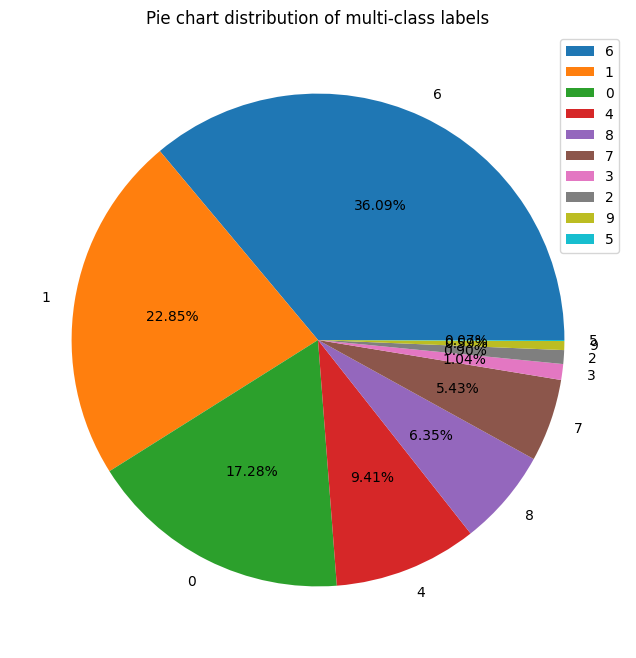

In [ ]:
# ===========================
# 📊 Step 17: Plot Pie Chart for Multi-Class Label Distribution
# ===========================

# Set up the figure size for the plot
plt.figure(figsize=(8, 8))

# Create a pie chart showing the distribution of unique attack categories
plt.pie(df['attack_cat'].value_counts(),
        labels=df['attack_cat'].unique(),   # Use unique attack categories as labels
        autopct='%0.2f%%')                   # Display percentage on the chart with two decimal places

# Set the title of the pie chart
plt.title('Pie chart distribution of multi-class labels')

# Add a legend to the chart, positioned at the best location
plt.legend(loc='best')

# Save the pie chart as a PNG file in the specified folder
plt.savefig(f'{plots_folder}/Pie_chart_multi.png')

# Display the plot
plt.show()


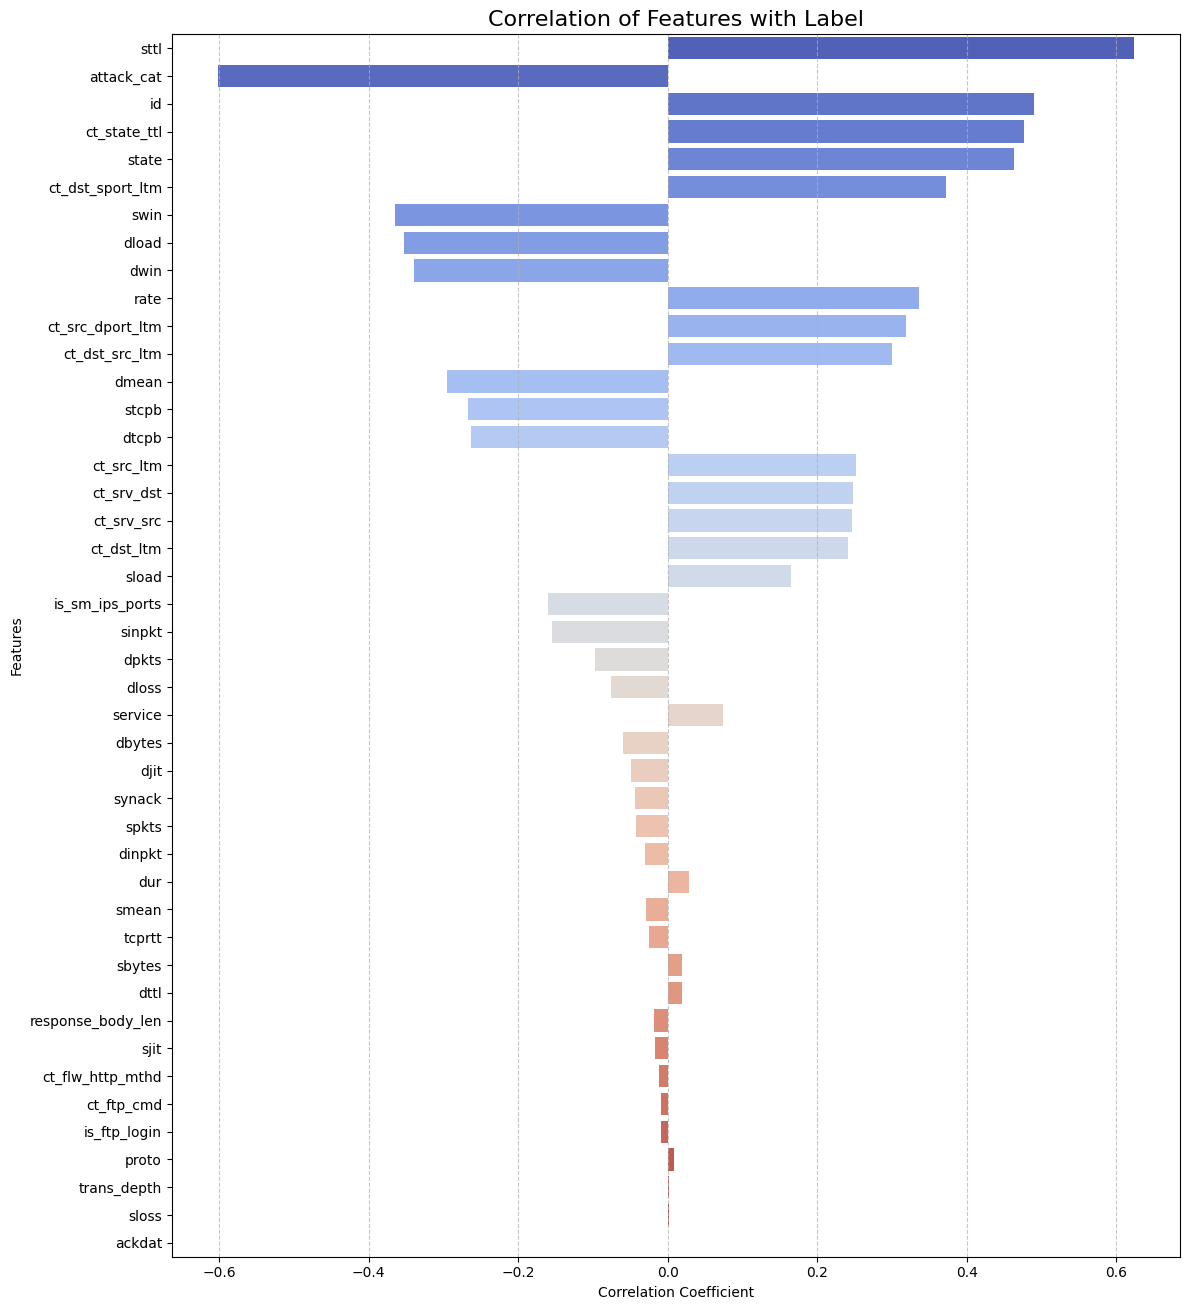

[✓] Correlation plot saved to: /kaggle/working/plots/label_feature_correlation.png


In [ ]:
# ===========================
# 📊 Step 18: Plot Feature Correlation with Label Only
# ===========================

# ✅ Calculate the correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# ✅ Extract only the correlations with the 'label' column and sort by absolute value
label_corr = corr_matrix['label'].drop('label').sort_values(key=lambda x: abs(x), ascending=False)

# ✅ Set the figure size based on number of features
plt.figure(figsize=(12, max(2, len(label_corr) * 0.3)))  # Dynamic height for better readability

# ✅ Plot the correlation with the label using a horizontal bar chart
sns.barplot(
    x=label_corr.values,
    y=label_corr.index,
    palette='coolwarm'
)

# ✅ Add labels and title
plt.title('Correlation of Features with Label', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# ✅ Save the plot as PNG
correlation_plot_path = f'{plots_folder}/label_feature_correlation.png'
plt.tight_layout()
plt.savefig(correlation_plot_path)

# ✅ Display the plot
plt.show()

# ✅ Print success message
print(f"[✓] Correlation plot saved to: {correlation_plot_path}")


In [ ]:
# ===========================
# 🔍 Step 19: Analyze Correlation with 'label' Column
# ===========================

# Calculate the correlation matrix for all numeric columns in the dataset
corr_matrix = df.corr(numeric_only=True)

# Extract the absolute correlation values between all columns and the 'label' column
corr_with_label = corr_matrix['label'].abs()  # We use absolute values to ignore negative correlations

# Extract features with a correlation higher than 0.3 with the 'label' column
highest_corr_bin = corr_with_label[corr_with_label > 0.3]

# Sort the results from lowest to highest correlation
highest_corr_bin = highest_corr_bin.sort_values(ascending=True)

# Display the most correlated features with the 'label' column
print("🔍 Top correlated features with 'label':")
print(highest_corr_bin)


🔍 Top correlated features with 'label':
ct_src_dport_ltm    0.318518
rate                0.335883
dwin                0.339166
dload               0.352169
swin                0.364877
ct_dst_sport_ltm    0.371672
state               0.462972
ct_state_ttl        0.476559
id                  0.490584
attack_cat          0.602160
sttl                0.624082
label               1.000000
Name: label, dtype: float64


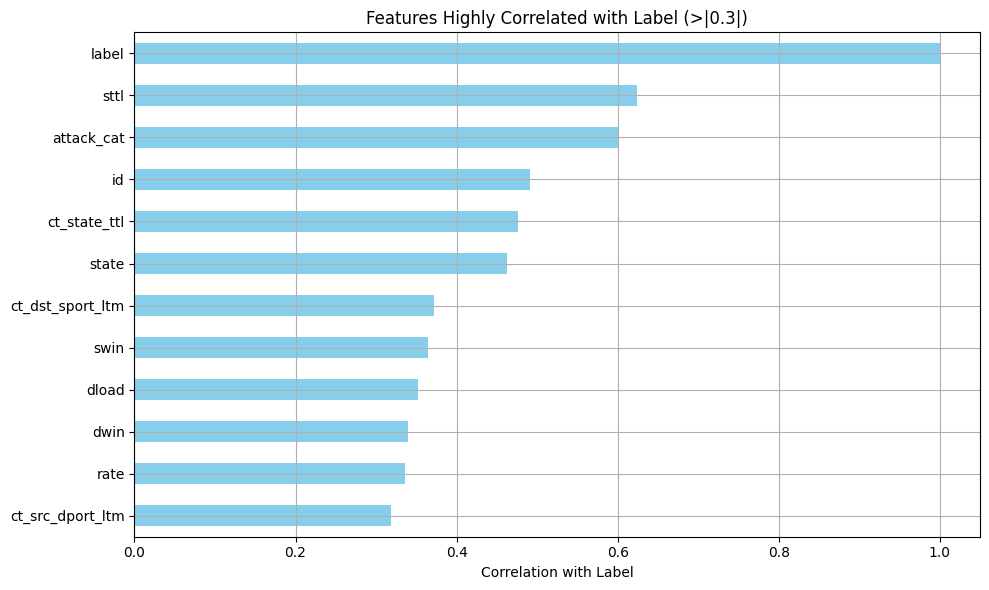

In [ ]:
# ===========================
# 📊 Step 20: Visualize Highly Correlated Features with 'label'
# ===========================

# Set up the figure size for the bar plot
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot to visualize the features highly correlated with the 'label'
highest_corr_bin.plot(kind='barh', color='skyblue')

# Set the title for the bar plot
plt.title("Features Highly Correlated with Label (>|0.3|)")

# Set the x-axis label
plt.xlabel("Correlation with Label")

# Add a grid for better readability of the plot
plt.grid(True)

# Adjust layout for a better fit and prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# ===========================
# 🔍 Step 21: Select Features with High Correlation to 'label'
# ===========================

# Select the attribute names (feature columns) that have a high correlation with the 'label' column
# These are the columns from the correlation matrix that have a correlation greater than 0.3 with the label
bin_cols = highest_corr_bin.index

# Display the selected columns
print("Selected Features with High Correlation to 'label':")
print(bin_cols)


Selected Features with High Correlation to 'label':
Index(['ct_src_dport_ltm', 'rate', 'dwin', 'dload', 'swin', 'ct_dst_sport_ltm',
       'state', 'ct_state_ttl', 'id', 'attack_cat', 'sttl', 'label'],
      dtype='object')


In [ ]:
# ===========================
# 🔍 Step 22: Create a Binary-Labelled Dataset
# ===========================

# Create a new DataFrame 'bin_data' that contains only the features with high correlation to 'label'
# These features were selected based on the Pearson correlation coefficient (> 0.3)
bin_data = df[bin_cols].copy()

# Display the resulting dataset
bin_data


,ct_src_dport_ltm,rate,dwin,dload,swin,ct_dst_sport_ltm,state,ct_state_ttl,id,attack_cat,sttl,label
0,1,74.087490,255,8495.365234,255,1,4,0,1,6,252,0
1,1,78.473372,255,503571.312500,255,1,4,1,2,6,62,0
2,1,14.170161,255,60929.230470,255,1,4,1,3,6,62,0
3,1,13.677108,255,3358.622070,255,1,4,1,4,6,62,0
4,2,33.373826,255,3987.059814,255,1,4,1,5,6,254,0
...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1,200000.005100,0,0.000000,0,1,5,2,82328,6,254,0
257669,1,24.410067,255,2242.109863,255,1,4,1,82329,6,254,0
257670,1,0.000000,0,0.000000,0,1,5,2,82330,6,0,0
257671,1,0.000000,0,0.000000,0,1,5,2,82331,6,0,0


In [ ]:
# ===========================
# 💾 Step 23: Save the Binary-Labelled Dataset to CSV
# ===========================

# Save the binary-labelled dataset to a CSV file in the working directory
bin_data.to_csv(f'{dataset_folder}/bin_data.csv', index=False)

# Display the information of the binary-labelled dataset
bin_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ct_src_dport_ltm  257673 non-null  int64  
 1   rate              257673 non-null  float64
 2   dwin              257673 non-null  int64  
 3   dload             257673 non-null  float64
 4   swin              257673 non-null  int64  
 5   ct_dst_sport_ltm  257673 non-null  int64  
 6   state             257673 non-null  int64  
 7   ct_state_ttl      257673 non-null  int64  
 8   id                257673 non-null  int64  
 9   attack_cat        257673 non-null  int64  
 10  sttl              257673 non-null  int64  
 11  label             257673 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 23.6 MB


In [ ]:
# Display the first 5 rows of the binary-labelled dataset
bin_data.head()


,ct_src_dport_ltm,rate,dwin,dload,swin,ct_dst_sport_ltm,state,ct_state_ttl,id,attack_cat,sttl,label
0,1,74.087490,255,8495.365234,255,1,4,0,1,6,252,0
1,1,78.473372,255,503571.312500,255,1,4,1,2,6,62,0
2,1,14.170161,255,60929.230470,255,1,4,1,3,6,62,0
3,1,13.677108,255,3358.622070,255,1,4,1,4,6,62,0
4,2,33.373826,255,3987.059814,255,1,4,1,5,6,254,0



🔍 Starting GridSearchCV for model: IsolationForest
Fitting 3 folds for each of 36 candidates, totalling 108 fits

✅ Finished training: IsolationForest
🔧 Best parameters: {'contamination': 0.09, 'max_features': 0.8, 'max_samples': 'auto', 'n_estimators': 40}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.34      0.86      0.49     18613
      Attack       0.43      0.06      0.11     32922

    accuracy                           0.35     51535
   macro avg       0.39      0.46      0.30     51535
weighted avg       0.40      0.35      0.24     51535

📈 AUC: 0.4607
🔍 First 10 predictions: [0 0 1 0 0 0 0 0 0 0]

🔍 Starting GridSearchCV for model: LocalOutlierFactor
Fitting 3 folds for each of 1 candidates, totalling 3 fits

✅ Finished training: LocalOutlierFactor
🔧 Best parameters: {}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       1.00      0.94      0.97     18613
      Attack      

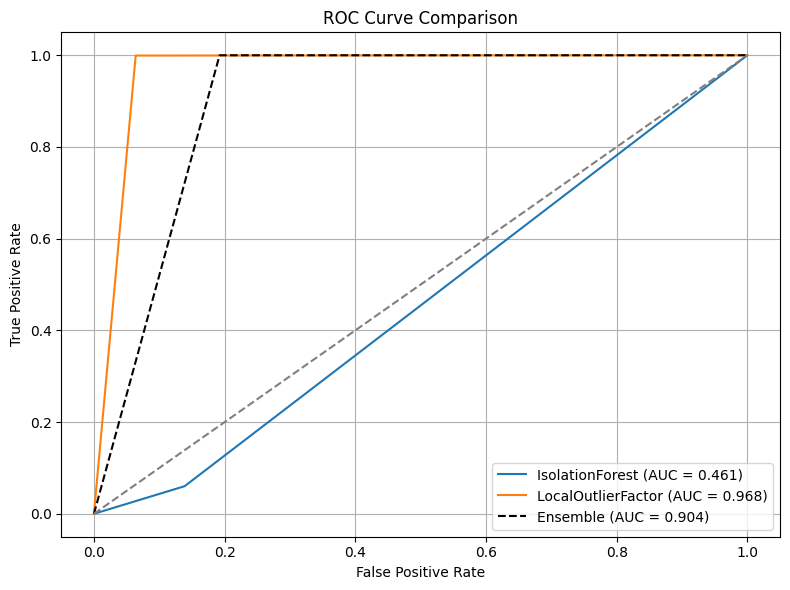

In [ ]:
# Import necessary libraries for data processing, machine learning, and evaluation
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, make_scorer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# ===========================
# Custom F1 Scorer for Model Evaluation
# ===========================
# This custom scorer flips the predicted class (1 -> 0, and 0 -> 1) and calculates the F1 score.
# The rationale is to focus on the minority class (Anomalies/Attacks) as it is the most important in anomaly detection.

def custom_f1_score(y_true, y_pred):
    y_pred_binary = np.where(y_pred == 1, 0, 1)  # Flip predictions for binary classification
    return f1_score(y_true, y_pred_binary)  # Calculate F1 score based on the flipped prediction

custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)  # Set the scorer to use the custom F1 score

# ===========================
# Load Dataset
# ===========================
# Load the preprocessed dataset into a pandas DataFrame
df = pd.read_csv(f"{dataset_folder}/bin_data.csv")

# Separate features and target label
X = df.drop('label', axis=1)  # Features: all columns except the 'label' column
y = df['label']  # Label: 'label' column represents the target variable

# ===========================
# Train-Test Split
# ===========================
# Split the dataset into training and testing sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===========================
# Feature Scaling
# ===========================
# Standardize features to have zero mean and unit variance using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform test data using the already fitted scaler

# ===========================
# Handling Missing Values
# ===========================
# Apply SimpleImputer to fill missing values with the median value of the column
imputer = SimpleImputer(strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)  # Fit imputer on training data and transform it
X_test_scaled = imputer.transform(X_test_scaled)  # Transform test data using the already fitted imputer

# ===========================
# Use Only Normal Data for Fitting (Optional)
# ===========================
# If you want to train the model only on the normal data (i.e., where 'label' = 0)
X_train_normal = X_train_scaled[y_train == 0]  # Only use normal (label = 0) data for training

# ===========================
# Parameter Grids for Hyperparameter Tuning
# ===========================
# Define parameter grid for Isolation Forest model
param_grid_if = {
    'n_estimators': [20, 30, 40],  # Number of trees in the forest
    'contamination': [0.06, 0.07, 0.08, 0.09],  # Proportion of outliers in the dataset
    'max_samples': ['auto'],  # Number of samples to use for each tree, 'auto' means using all data
    'max_features': [0.6, 0.7, 0.8]  # Proportion of features to use for each tree
}

# ===========================
# Define Models
# ===========================
# Define models to be evaluated
models = {
    'IsolationForest': IsolationForest(),
    'LocalOutlierFactor': LocalOutlierFactor(novelty=True)  # Uncomment to test LOF
}

# Define parameter grids for each model
param_grids = {
    'IsolationForest': param_grid_if,
    'LocalOutlierFactor': {}  # LOF doesn't require a param grid in this case
}

best_models = {}  # Store the best models after tuning
best_params = {}  # Store the best hyperparameters after tuning
roc_aucs = {}  # Store the ROC AUC scores for each model

# ===========================
# Grid Search and Model Evaluation
# ===========================
# Iterate through each model and perform GridSearchCV to find the best hyperparameters
for name, model in models.items():
    print(f"\n🔍 Starting GridSearchCV for model: {name}")

    # If using LOF, train only on normal data
    X_fit = X_train_normal if name == 'LocalOutlierFactor' else X_train_scaled

    # Initialize GridSearchCV with the defined parameter grid and custom scorer
    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=3,  # 3-fold cross-validation
        n_jobs=-1,  # Use all available CPU cores
        verbose=1,  # Show verbose output
        scoring=custom_scorer  # Use the custom F1 scorer for evaluation
    )

    # Fit the model with the training data
    grid_search.fit(X_fit, y_train if name != 'LocalOutlierFactor' else y_train[y_train == 0])

    # Get the best model and parameters after GridSearchCV
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    best_params[name] = grid_search.best_params_

    # Make predictions and evaluate the model
    y_pred = best_model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)  # Flip predictions to match the label format

    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)  # Compute the ROC curve
    roc_auc = auc(fpr, tpr)  # Compute the AUC score
    roc_aucs[name] = roc_auc

    # Output evaluation results
    print(f"\n✅ Finished training: {name}")
    print(f"🔧 Best parameters: {grid_search.best_params_}")
    print("📊 Classification report:")
    print(classification_report(y_test, y_pred_binary, target_names=["Normal", "Attack"]))
    print(f"📈 AUC: {roc_auc:.4f}")
    print(f"🔍 First 10 predictions: {y_pred_binary[:10]}")

    # Save the best model to disk
    os.makedirs(f'{model_folder}/', exist_ok=True)  # Ensure the model folder exists
    joblib.dump(best_model, f'{model_folder}/{name}_best.joblib')  # Save model using joblib

# ===========================
# Ensemble Voting
# ===========================
# Collect predictions from each model for ensemble voting
predictions = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)  # Flip predictions
    predictions[name] = y_pred_binary

# Combine individual predictions into a single ensemble prediction
ensemble_votes = np.mean(np.array(list(predictions.values())), axis=0)  # Average the predictions
ensemble_pred = (ensemble_votes >= 0.5).astype(int)  # Majority voting (threshold = 0.5)

# Evaluate ensemble model
print("\n📊 Ensemble Voting Evaluation")
ensemble_report = classification_report(y_test, ensemble_pred, target_names=["Normal", "Attack"])
print(ensemble_report)

fpr, tpr, _ = roc_curve(y_test, ensemble_pred)  # ROC curve for ensemble
roc_auc = auc(fpr, tpr)  # AUC for ensemble
roc_aucs['Ensemble'] = roc_auc
print(f"📈 Ensemble AUC: {roc_auc:.4f}")

# ===========================
# Save Classification Reports
# ===========================
# Save classification reports for all models and ensemble into a CSV file
classification_reports = {
    name: classification_report(y_test, pred, output_dict=True, target_names=["Normal", "Attack"])
    for name, pred in predictions.items()
}
classification_reports['Ensemble'] = classification_report(y_test, ensemble_pred, output_dict=True, target_names=["Normal", "Attack"])

df_reports = pd.DataFrame(classification_reports).transpose()
df_reports.to_csv(f"{model_folder}/classification_reports_with_gridsearch.csv")

# ===========================
# Plot ROC Curves
# ===========================
# Plot ROC curves for each model and ensemble
plt.figure(figsize=(8, 6))
for name, y_pred_binary in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot ROC curve for ensemble
fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.3f})", linestyle='--', color='black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line representing random guessing
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{model_folder}/ensemble_roc_comparison_with_gridsearch.png")  # Save plot as PNG
plt.show()

# ===========================
# Save AUC and Best Parameters
# ===========================
# Save results (AUC and best parameters) into a CSV file
results_list = []
for name in best_models:
    result = {"Model": name, "AUC": roc_aucs[name]}
    result.update(best_params[name])  # Include the best parameters for each model
    results_list.append(result)

results_list.append({
    "Model": "Ensemble",
    "AUC": roc_aucs['Ensemble']
})

df_auc_params = pd.DataFrame(results_list)
df_auc_params.to_csv(f"{model_folder}/auc_and_best_params.csv", index=False)  # Save results to CSV



🔍 Starting GridSearchCV for model: IsolationForest
Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
504 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
504 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_iforest.py", line 289, in fit
    self._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/


✅ Finished training: IsolationForest
🔧 Best parameters: {'contamination': 0.4, 'max_features': 0.6, 'max_samples': 0.9, 'n_estimators': 9}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.58      0.73      0.64     93000
      Attack       0.82      0.70      0.75    164673

    accuracy                           0.71    257673
   macro avg       0.70      0.71      0.70    257673
weighted avg       0.73      0.71      0.71    257673

📈 AUC: 0.7140
🔍 First 10 predictions: [1 1 1 1 0 0 0 1 1 1]

🔍 Starting GridSearchCV for model: LocalOutlierFactor
Fitting 3 folds for each of 4 candidates, totalling 12 fits

✅ Finished training: LocalOutlierFactor
🔧 Best parameters: {'n_neighbors': 30, 'novelty': True}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.37      0.94      0.53     93000
      Attack       0.71      0.08      0.15    164673

    accuracy                           0.39    

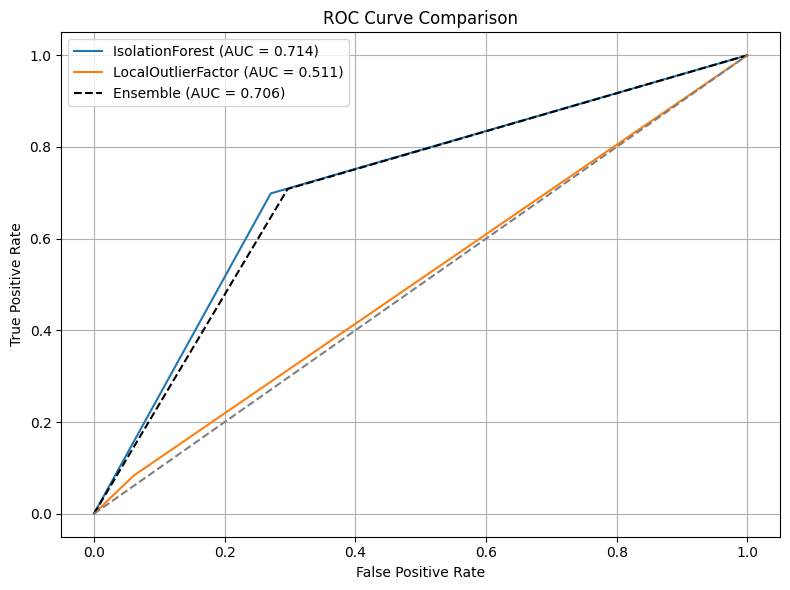

In [ ]:
# Import necessary libraries for data processing, machine learning, and evaluation
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, make_scorer
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Custom scorer function using F1 score for anomaly detection
def custom_f1_score(y_true, y_pred):
    # Convert the predicted labels to binary: Flip '1' to '0' and '0' to '1'
    y_pred_binary = np.where(y_pred == 1, 0, 1)
    # Return the F1 score, a balanced metric for classification tasks
    return f1_score(y_true, y_pred_binary)

# Create a scorer that uses our custom F1 score
custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)

# ================================
# Data Loading and Preprocessing
# ================================
# Load the dataset from the specified CSV file
df = pd.read_csv(f"{dataset_folder}/bin_data.csv")

# Separate features (X) and the target label (y)
X = df.drop('label', axis=1)  # Features are all columns except 'label'
y = df['label']  # Target label, which indicates anomaly or normal data

# Sampling 80% of normal data and 20% of attack data for training
normal_data = df[df['label'] == 0]  # Select normal data (label = 0)
attack_data = df[df['label'] == 1]  # Select attack data (label = 1)

# Sample 80% of normal data and 20% of attack data to balance the dataset
normal_sample = normal_data.sample(frac=0.8, random_state=42)  # 80% normal data
attack_sample = attack_data.sample(frac=0.2, random_state=42)  # 20% attack data

# Concatenate the sampled data into a training set
train_df = pd.concat([normal_sample, attack_sample])

# Features and target label for the training set
X_train = train_df.drop('label', axis=1)  # Features for training
y_train = train_df['label']  # Labels for training

# Use the full dataset for testing
X_test = X  # Features for testing
y_test = y  # Labels for testing

# ================================
# Feature Scaling
# ================================
# Apply StandardScaler to normalize features, ensuring they have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on training data and apply transformation
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# ================================
# Handle Missing Values
# ================================
# Use SimpleImputer to fill missing values with the median of each feature
imputer = SimpleImputer(strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)  # Apply imputer to training data
X_test_scaled = imputer.transform(X_test_scaled)  # Apply imputer to test data (using the same imputer)

# ================================
# Define Hyperparameter Grids
# ================================
# Hyperparameter grid for tuning the Isolation Forest model
param_grid_if = {
    'n_estimators': [8, 9, 10, 11, 13, 15, 20],  # Number of trees in the forest
    'contamination': [0.09, 0.1, 0.3, 0.4, 0.5, 'auto'],  # Proportion of anomalies
    'max_samples': ['auto', 0.7, 0.8, 0.9],  # Proportion of samples used to fit each tree
    'max_features': [5.0, 0.6, 0.7, 0.8, 0.9, 1.0]  # Proportion of features used to fit each tree
}


# Hyperparameter grid for tuning the Local Outlier Factor model
param_grid_lof = {
    'n_neighbors': [20, 30, 40, 50],  # Number of neighbors to consider for outlier detection
    'novelty': [True]  # Whether to use the model for novelty detection (anomaly detection)
}

# ================================
# Define Models
# ================================
# Define the models that will be evaluated: Isolation Forest, Local Outlier Factor, and One-Class SVM
models = {
    'IsolationForest': IsolationForest(),
    'LocalOutlierFactor': LocalOutlierFactor(novelty=True)
}

# Define the corresponding hyperparameter grids for each model
param_grids = {
    'IsolationForest': param_grid_if,
    'LocalOutlierFactor': param_grid_lof
}

# Dictionary to store the best models, parameters, and AUC scores
best_models = {}
best_params = {}
roc_aucs = {}

# ================================
# Model Training and Evaluation
# ================================
# Loop through each model, perform GridSearchCV for hyperparameter tuning, and evaluate the model
for name, model in models.items():
    print(f"\n🔍 Starting GridSearchCV for model: {name}")

    # Initialize GridSearchCV for hyperparameter tuning, using the custom F1 scorer
    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=3,  # 3-fold cross-validation
        n_jobs=-1,  # Use all available CPU cores for computation
        verbose=1,  # Display progress messages
        scoring=custom_scorer  # Use the custom F1 score as the evaluation metric
    )

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model and its hyperparameters from GridSearchCV
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    best_params[name] = grid_search.best_params_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)  # Flip predictions to match the target labels (normal = 0, attack = 1)

    # Calculate ROC curve and AUC (Area Under the Curve) for the model
    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)  # Compute false positive and true positive rates
    roc_auc = auc(fpr, tpr)  # Calculate the AUC score (performance metric)
    roc_aucs[name] = roc_auc

    # Print the results: best parameters, classification report, and AUC score
    print(f"\n✅ Finished training: {name}")
    print(f"🔧 Best parameters: {grid_search.best_params_}")
    print("📊 Classification report:")
    print(classification_report(y_test, y_pred_binary, target_names=["Normal", "Attack"]))
    print(f"📈 AUC: {roc_auc:.4f}")
    print(f"🔍 First 10 predictions: {y_pred_binary[:10]}")

    # Save the best model to disk using joblib
    os.makedirs(f'{model_folder}/', exist_ok=True)  # Ensure the directory exists
    joblib.dump(best_model, f'{model_folder}/{name}_2_best.joblib')  # Save the model to disk

# ================================
# Ensemble Voting
# ================================
# Gather predictions from each model for ensemble voting
predictions = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)  # Flip predictions to match target labels
    predictions[name] = y_pred_binary

# Average the predictions from each model to form the ensemble prediction
ensemble_votes = np.mean(np.array(list(predictions.values())), axis=0)  # Average the predicted probabilities
ensemble_pred = (ensemble_votes >= 0.5).astype(int)  # Majority voting (threshold = 0.5)

# Evaluate the ensemble model's performance
print("\n📊 Ensemble Voting Evaluation")
ensemble_report = classification_report(y_test, ensemble_pred, target_names=["Normal", "Attack"])
print(ensemble_report)

# Calculate ROC curve and AUC for the ensemble model
fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
roc_aucs['Ensemble'] = roc_auc
print(f"📈 Ensemble AUC: {roc_auc:.4f}")

# ===========================
# Save Classification Reports
# ===========================
# Save classification reports for all models and ensemble into a CSV file
classification_reports = {
    name: classification_report(y_test, pred, output_dict=True, target_names=["Normal", "Attack"])
    for name, pred in predictions.items()
}
classification_reports['Ensemble'] = classification_report(y_test, ensemble_pred, output_dict=True, target_names=["Normal", "Attack"])

df_reports = pd.DataFrame(classification_reports).transpose()
df_reports.to_csv(f"{model_folder}/2_classification_reports_with_gridsearch.csv")

# ===========================
# Plot ROC Curves
# ===========================
# Plot ROC curves for each model and ensemble
plt.figure(figsize=(8, 6))
for name, y_pred_binary in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot ROC curve for ensemble
fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.3f})", linestyle='--', color='black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line representing random guessing
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{model_folder}/2_ensemble_roc_comparison_with_gridsearch.png")  # Save plot as PNG
plt.show()

# ===========================
# Save AUC and Best Parameters
# ===========================
# Save results (AUC and best parameters) into a CSV file
results_list = []
for name in best_models:
    result = {"Model": name, "AUC": roc_aucs[name]}
    result.update(best_params[name])  # Include the best parameters for each model
    results_list.append(result)

results_list.append({
    "Model": "Ensemble",
    "AUC": roc_aucs['Ensemble']
})

df_auc_params = pd.DataFrame(results_list)
df_auc_params.to_csv(f"{model_folder}/2_auc_and_best_params.csv", index=False)  # Save results to CSV


Epoch 1/100


I0000 00:00:1746367659.756646      67 service.cc:148] XLA service 0x7d389800bf20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746367659.759078      67 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746367660.126227      67 cuda_dnn.cc:529] Loaded cuDNN version 90300


 121/9300 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.5095

I0000 00:00:1746367661.009347      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9289/9300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0271
Epoch 1: val_loss improved from inf to 0.00174, saving model to /kaggle/working/model/autoencoder_model.keras
9300/9300 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 0.0271 - val_loss: 0.0017
Epoch 2/100
9293/9300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027
Epoch 2: val_loss improved from 0.00174 to 0.00150, saving model to /kaggle/working/model/autoencoder_model.keras
9300/9300 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 3/100
9265/9300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016
Epoch 3: val_loss improved from 0.00150 to 0.00054, saving model to /kaggle/working/model/autoencoder_model.keras
9300/9300 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.0016 - val_loss: 5.4145e-04
Epoch 4/100
9272/9300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014
Epoch 4: val_loss did not improve from 0.00054
9300/9300 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.0014 - val_loss: 5.4157e-04
Epoch 5/100
9261/9300 ━━━━━

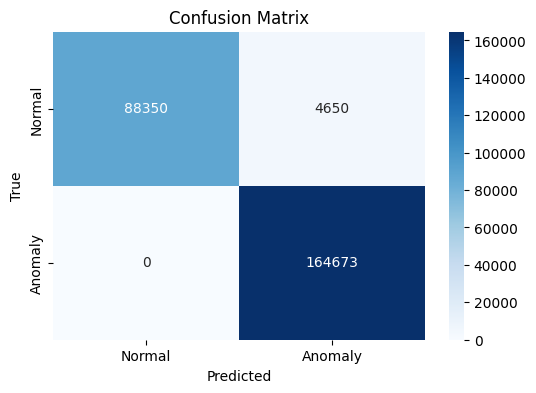

[✓] Loss plot saved to: /kaggle/working/model/training_loss.png


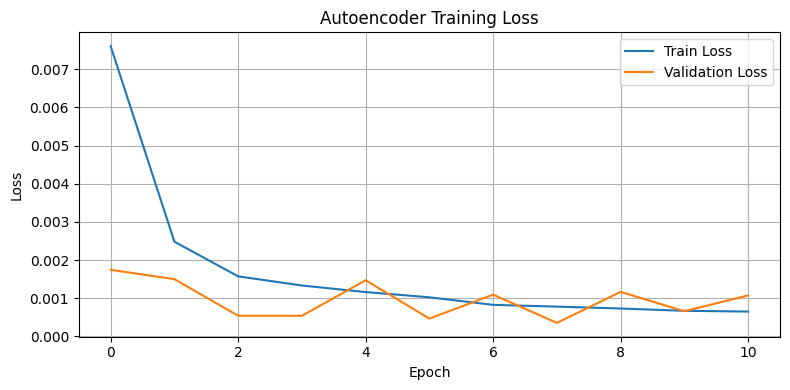

[✓] Plot with highlighted first bin saved to: /kaggle/working/model/highlighted_normal_error_distribution.png


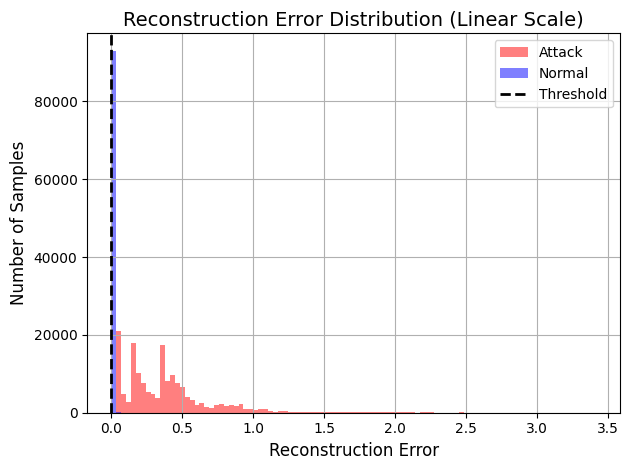

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ========== SETTINGS ==========
# Define the paths for data input, model output, and plot storage
DATA_PATH = '/kaggle/working/dataset/bin_data.csv'  # Input CSV containing the dataset
OUTPUT_CSV = '/kaggle/working/model/anomaly_detection_results.csv'  # Output file for saving predictions
MODEL_PATH = '/kaggle/working/model/autoencoder_model.keras'  # Path to save the trained autoencoder model
PLOT_DIR = '/kaggle/working/model/'  # Directory to store plots
os.makedirs(PLOT_DIR, exist_ok=True)  # Create the directory if it doesn't exist

# ========== LOAD & PREPARE DATA ==========
# Load the dataset into a pandas DataFrame
data = pd.read_csv(DATA_PATH)
# Split the data into features (X) and target label (y)
X = data.drop(columns=['label'])
y = data['label']

# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use only normal samples (label == 0) for training the autoencoder
X_normal = X_scaled[y == 0]
# Split the normal samples into training and validation sets (80% training, 20% validation)
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

# ========== AUTOENCODER MODEL ==========
# Define the input shape based on the number of features in the training data
input_dim = X_train.shape[1]

# Define the architecture of the autoencoder
input_layer = Input(shape=(input_dim,))

# Encoder: Series of fully connected layers to learn a compressed representation of the input
encoded = Dense(128, activation='relu')(input_layer)  # First hidden layer in encoder
encoded = Dense(64, activation='relu')(encoded)      # Second hidden layer in encoder
encoded = Dense(32, activation='relu')(encoded)      # Third hidden layer in encoder

# Decoder: Series of layers mirroring the encoder to reconstruct the input
decoded = Dense(64, activation='relu')(encoded)      # First hidden layer in decoder
decoded = Dense(128, activation='relu')(decoded)     # Second hidden layer in decoder
decoded = Dense(input_dim, activation='linear')(decoded)  # Output layer for reconstruction

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
# Compile the model using Adam optimizer and Mean Squared Error loss function
autoencoder.compile(optimizer='adam', loss='mse')

# ========== CALLBACKS ==========
# Define early stopping to prevent overfitting and restore best weights
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Define model checkpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint(MODEL_PATH, save_best_only=True, monitor='val_loss', verbose=1)

# ========== TRAINING ==========
# Train the autoencoder using the training data
history = autoencoder.fit(
    X_train, X_train,  # Train the model using the input data for both input and output (autoencoder)
    epochs=100,        # Set the maximum number of epochs
    batch_size=8,      # Set the batch size for training
    validation_data=(X_val, X_val),  # Use the validation data for monitoring performance
    shuffle=True,      # Shuffle the training data at each epoch
    verbose=1,         # Display training progress
    callbacks=[early_stop, model_checkpoint]  # Use callbacks for early stopping and model checkpoint
)

# Output message indicating that the model has been saved
print(f"[✓] Model saved to: {MODEL_PATH}")

# ========== PREDICTION ==========
# Use the trained autoencoder to predict the reconstruction of all samples
X_pred = autoencoder.predict(X_scaled)
# Calculate the reconstruction error (Mean Squared Error between original and predicted data)
mse = np.mean(np.power(X_pred - X_scaled, 2), axis=1)
# Set a threshold for anomaly detection based on the 95th percentile of reconstruction error for normal samples
threshold = np.percentile(mse[y == 0], 95)

# Predict anomalies: if reconstruction error is greater than the threshold, classify as anomaly (1), else normal (0)
predictions = (mse > threshold).astype(int)

# Save the predictions and reconstruction errors to a new CSV file
output_df = data.copy()  # Create a copy of the original data
output_df['reconstruction_error'] = mse  # Add the reconstruction error as a new column
output_df['predicted'] = predictions  # Add the predictions as a new column
output_df.to_csv(OUTPUT_CSV, index=False)  # Save the results to CSV

# Output message indicating that predictions have been saved
print(f"[✓] Predictions saved to: {OUTPUT_CSV}")

# ========== METRICS ==========
# Calculate evaluation metrics (AUC and F1 score)
y_true = y.values  # Convert the true labels to a numpy array
auc = roc_auc_score(y_true, mse)  # AUC score based on the reconstruction error
f1 = f1_score(y_true, predictions)  # F1 score for anomaly detection

# Print the evaluation metrics
print(f"AUC Score: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, predictions))

# ========== CONFUSION MATRIX HEATMAP ==========
# Generate confusion matrix to evaluate the model performance
conf_mat = confusion_matrix(y_true, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')  # Label for x-axis
plt.ylabel('True')       # Label for y-axis
plt.title('Confusion Matrix')  # Title of the plot
conf_path = os.path.join(PLOT_DIR, 'confusion_matrix.png')  # Path to save the confusion matrix plot
plt.savefig(conf_path)  # Save the confusion matrix plot
print(f"[✓] Confusion matrix plot saved to: {conf_path}")
plt.show()  # Display the plot
plt.close()  # Close the plot

# ========== PLOT TRAINING LOSS ==========
# Plot the training and validation loss curves
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss over epochs
plt.title('Autoencoder Training Loss')  # Title of the loss plot
plt.xlabel('Epoch')  # Label for x-axis (Epochs)
plt.ylabel('Loss')   # Label for y-axis (Loss)
plt.legend()         # Display legend
plt.grid(True)       # Show grid for better readability
plt.tight_layout()   # Ensure tight layout for the plot
loss_path = os.path.join(PLOT_DIR, 'training_loss.png')  # Path to save the training loss plot
plt.savefig(loss_path)  # Save the training loss plot
print(f"[✓] Loss plot saved to: {loss_path}")
plt.show()  # Display the plot
plt.close()  # Close the plot

# ========== PLOT RECONSTRUCTION ERROR DISTRIBUTION ==========
# Create a DataFrame with reconstruction errors and true labels
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_label': y_true})

# Separate the reconstruction errors for normal and attack (anomaly) samples
normal_errors = error_df[error_df['true_label'] == 0]['reconstruction_error']
attack_errors = error_df[error_df['true_label'] == 1]['reconstruction_error']

# Define bins for the histogram
bins = np.linspace(0, max(attack_errors.max(), normal_errors.max()), 100)

# Plot the distribution of reconstruction errors for attack samples
plt.hist(attack_errors, bins=bins, color='red', alpha=0.5, label='Attack')

# Plot the distribution of reconstruction errors for normal samples
plt.hist(normal_errors, bins=bins, color='blue', alpha=0.5, label='Normal')

# Draw a vertical line to indicate the anomaly detection threshold
plt.axvline(threshold, color='black', linestyle='--', linewidth=2, label='Threshold')

# Plot settings and labels
plt.title('Reconstruction Error Distribution (Linear Scale)', fontsize=14)
plt.xlabel('Reconstruction Error', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.legend()  # Display the legend
plt.grid(True)  # Display grid for better readability
plt.tight_layout()  # Ensure tight layout for the plot

# Save the plot with highlighted threshold line
error_path = os.path.join(PLOT_DIR, 'highlighted_normal_error_distribution.png')
plt.savefig(error_path)  # Save the plot
print(f"[✓] Plot with highlighted first bin saved to: {error_path}")
plt.show()  # Display the plot
plt.close()  # Close the plot


In [ ]:
from sklearn.metrics import roc_curve

# ========== CALCULATING ROC CURVE VALUES ==========
# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds using the roc_curve function
# 'y_true' is the true labels (0 for normal, 1 for attack)
# 'mse' is the reconstruction error (mean squared error) from the autoencoder model
fpr, tpr, thresholds = roc_curve(y_true, mse)

# ========== PLOTTING THE ROC CURVE ==========
# Create a figure for plotting with a size of (6, 4)
plt.figure(figsize=(6, 4))

# Plot the ROC curve: false positive rate (fpr) on the x-axis, true positive rate (tpr) on the y-axis
# We also display the AUC score in the label
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='darkorange')

# Plot the diagonal line representing a random classifier (45-degree line)
# This is used to compare the performance of the classifier against random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set the labels for the x and y axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Title for the plot
plt.title('ROC Curve - Autoencoder Anomaly Detection')

# Add the legend with the AUC score in the lower right corner
plt.legend(loc='lower right')

# Display the grid for better readability
plt.grid(True)

# Save the ROC curve plot to the specified path
roc_path = os.path.join(PLOT_DIR, 'roc_curve.png')
plt.savefig(roc_path)
print(f"[✓] ROC curve plot saved to: {roc_path}")

# Display the plot
plt.show()

# Close the plot to free up resources
plt.close()


[✓] ROC curve plot saved to: /kaggle/working/model/roc_curve.png


In [ ]:
# ========== CREATE ERROR DATAFRAME ==========
# Create a DataFrame to store the reconstruction errors and the corresponding true labels
# The 'reconstruction_error' is the error between the original data and its reconstruction
# The 'true_label' indicates whether the sample is normal (0) or an attack (1)
error_df = pd.DataFrame({
    'reconstruction_error': mse,  # Reconstruction error for each sample
    'true_label': y_true         # True label for each sample (0 for normal, 1 for attack)
})

# ========== SUMMARY STATISTICS ==========
# Print summary statistics for reconstruction error for normal samples
# We filter the error_df to include only the rows where true_label is 0 (normal samples)
print("Normal samples:")
# Describe the 'reconstruction_error' column for normal samples
# This will provide key statistics such as mean, standard deviation, min, max, and quartiles
print(error_df[error_df['true_label'] == 0]['reconstruction_error'].describe())

# Print summary statistics for reconstruction error for attack (anomaly) samples
print("\nAttack samples:")
# Filter the error_df to include only attack samples (where true_label == 1)
# Then describe the 'reconstruction_error' column for attack samples
print(error_df[error_df['true_label'] == 1]['reconstruction_error'].describe())


In [ ]:
import matplotlib.pyplot as plt

# ========== DEFINE MAX ERROR FOR NORMAL DATA ==========
# Define the maximum error value for normal (non-anomalous) samples
# This will be used to limit the x-axis range for normal errors
normal_max_error = 3.653360e-03  # Maximum error value observed for normal samples

# ========== FILTER NORMAL ERROR DATA ==========
# Extract the reconstruction error values for normal samples (true_label == 0)
normal_errors_filtered = error_df[error_df['true_label'] == 0]['reconstruction_error']

# Further filter the normal error values to exclude the smallest errors
# This is useful for focusing on errors that are more indicative of "normal" behavior
normal_errors_filtered = normal_errors_filtered[normal_errors_filtered > normal_errors_filtered.min()]

# ========== CREATE DOUBLE SUBPLOT ==========
# Create a 1x2 subplot to display two histograms: one for normal samples and one for attack samples
# The figsize is set to (14, 5) for a wide plot layout
# sharey=False means each subplot has its own y-axis scale
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# ========== PLOT NORMAL ERROR DISTRIBUTION ==========
# Plot the distribution of reconstruction errors for normal samples on the first subplot (axs[0])
# The histogram is created with 100 bins and a blue color with some transparency (alpha=0.7)
axs[0].hist(
    normal_errors_filtered,
    bins=100, color='blue', alpha=0.7
)

# Add a vertical line representing the threshold value for anomaly detection
# The threshold line is used to differentiate between normal and attack samples
axs[0].axvline(threshold, color='black', linestyle='--', label='Threshold')

# Set the title, axis labels, and limit for the x-axis (from 0 to the predefined max error)
axs[0].set_title('Error Distribution - Normal')
axs[0].set_xlabel('Reconstruction Error')
axs[0].set_ylabel('Number of Samples')
axs[0].set_xlim(0, normal_max_error)  # Limit the x-axis range to normal error values

# Add a legend to label the threshold line
axs[0].legend()

# Enable grid for better readability of the plot
axs[0].grid(True)

# ========== PLOT ATTACK ERROR DISTRIBUTION ==========
# Plot the distribution of reconstruction errors for attack (anomaly) samples on the second subplot (axs[1])
# The histogram is created with 100 bins and a red color with some transparency (alpha=0.7)
axs[1].hist(
    error_df[error_df['true_label'] == 1]['reconstruction_error'],
    bins=100, color='red', alpha=0.7
)

# Add the same threshold line on the attack plot to show where anomalies are detected
axs[1].axvline(threshold, color='black', linestyle='--', label='Threshold')

# Set the title and axis labels for the attack plot
axs[1].set_title('Error Distribution - Attack')
axs[1].set_xlabel('Reconstruction Error')

# Add a legend to label the threshold line
axs[1].legend()

# Enable grid for better readability of the plot
axs[1].grid(True)

# ========== FINALIZE PLOT LAYOUT ==========
# Automatically adjust the layout to avoid overlapping elements
plt.tight_layout()

# ========== SAVE PLOT ==========
# Save the figure with the split error distribution plot as an image file
# The path is defined dynamically using the PLOT_DIR variable and the desired file name
error_path = os.path.join(PLOT_DIR, 'split_error_distribution_filtered.png')

# Save the plot as a PNG file
plt.savefig(error_path)

# Print confirmation message showing where the plot has been saved
print(f"[✓] The split plot has been saved to: {error_path}")

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ========== EXTRACT ERROR VALUES ==========
# Extract the reconstruction error values for normal samples (true_label == 0)
normal_errors = error_df[error_df['true_label'] == 0]['reconstruction_error']

# Extract the reconstruction error values for attack (anomalous) samples (true_label == 1)
attack_errors = error_df[error_df['true_label'] == 1]['reconstruction_error']

# ========== DEFINE SHARED BINS FOR HISTOGRAM ==========
# Define a set of evenly spaced bins for the histogram based on the minimum and maximum error values
# We use np.linspace to create 100 bins that span from 0 to the maximum error found in either normal or attack errors
bins = np.linspace(0, max(attack_errors.max(), normal_errors.max()), 100)

# ========== PLOT ATTACK ERROR DISTRIBUTION ==========
# Plot the distribution of reconstruction errors for attack (anomalous) samples
# The histogram is created with the bins defined above, a red color, and 50% transparency (alpha=0.5)
plt.hist(attack_errors, bins=bins, color='red', alpha=0.5, label='Attack')

# ========== PLOT NORMAL ERROR DISTRIBUTION ==========
# Plot the distribution of reconstruction errors for normal samples
# The histogram is created with the same bins, a blue color, and 50% transparency (alpha=0.5)
plt.hist(normal_errors, bins=bins, color='blue', alpha=0.5, label='Normal')

# ========== HIGHLIGHT FIRST BIN OF "NORMAL" DISTRIBUTION ==========
# Define a mask to highlight the first bin of the "Normal" distribution
# This mask selects the normal errors that are smaller than the value of the first bin
first_bin_mask = normal_errors < bins[1]

# ========== DRAW THRESHOLD LINE ==========
# Draw a vertical threshold line that separates normal from anomalous (attack) samples
# The threshold is set by the threshold value, using a dashed black line
plt.axvline(threshold, color='black', linestyle='--', linewidth=2, label='Threshold')

# ========== PLOT SETTINGS ==========
# Set the title of the plot to explain what the plot represents
plt.title('Reconstruction Error Distribution (Linear Scale)', fontsize=14)

# Set the labels for the x and y axes
plt.xlabel('Reconstruction Error', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)

# Add a legend to identify the color-coded labels (Normal, Attack, Threshold)
plt.legend()

# Enable grid lines on the plot for better readability
plt.grid(True)

# Automatically adjust the layout of the plot to avoid overlap of titles and labels
plt.tight_layout()

# ========== SAVE THE PLOT ==========
# Save the generated plot as a PNG image in the specified directory (PLOT_DIR)
error_path = os.path.join(PLOT_DIR, 'highlighted_normal_error_distribution.png')

# Save the plot as a file
plt.savefig(error_path)

# Print a message confirming the location where the plot has been saved
print(f"[✓] Plot with highlighted first bin saved to: {error_path}")

# Display the plot on the screen
plt.show()

# Close the plot to free up memory
plt.close()


In [ ]:
# ========== COUNTING NORMAL AND ATTACK SAMPLES ==========
# Count the number of samples labeled as 'Normal' (true_label == 0)
# This is done by summing up all instances where the true_label is 0 in the 'y_true' array.
# The expression (y_true == 0) creates a boolean mask that is True for normal samples and False for attack samples.
# The '.sum()' method then counts the number of True values (i.e., the number of normal samples).
print("Normal count:", (y_true == 0).sum())

# Count the number of samples labeled as 'Attack' (true_label == 1)
# Similar to the previous step, we count the number of samples where the true_label is 1.
# The expression (y_true == 1) creates a boolean mask that is True for attack samples.
# The '.sum()' method counts how many times this condition is True (i.e., the number of attack samples).
print("Attack count:", (y_true == 1).sum())


In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/working/model/anomaly_detection_results.csv')

# Display general information about the DataFrame (e.g., number of entries, column names, data types, memory usage)
df.info()

# Display the first 5 rows of the DataFrame
df.head()
